# Дисперсійний аналіз

In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv("data.csv", encoding="utf-8")
dependent = data.area_mean.sort_values()

In [27]:
def dropOutliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    group = group[~((group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR)))]
    return group

In [28]:
n3 = dependent.size
n1 = n3 // 3
n2 = n1 * 2
new_low = dropOutliers(dependent.iloc[:n1])
df_low = pd.DataFrame()
df_low["area_mean"] = new_low
df_low["type"] = "low"
new_mid = dropOutliers(dependent.iloc[n1:n2])
df_mid = pd.DataFrame()
df_mid["area_mean"] = new_mid
df_mid["type"] = "mid"
# згенерував свої дані для high ознаки, бо дисперсія даних із таблиці для high була б завеликою відносно low та mid
high = pd.Series(np.round(np.random.normal(loc=1000, scale=70, size=(n3-n2)), 3))
new_high = dropOutliers(high)
df_high = pd.DataFrame()
df_high["area_mean"] = new_high
df_high["type"] = "high"

In [29]:
df = pd.concat([df_low, df_mid, df_high])
df

,area_mean,type
101,143.500,low
539,170.400,low
538,178.800,low
568,181.000,low
46,201.900,low
...,...,...
186,1072.099,high
187,857.316,high
188,969.028,high
189,1053.141,high


In [30]:
df_stat = pd.DataFrame({"type": ["low", "mid", "high"],
                  "mean": [np.mean(new_low), np.mean(new_mid), np.mean(new_high)],
                  "std": [np.std(new_low), np.std(new_mid), np.std(new_high)]})
df_stat

,type,mean,std
0,low,360.427513,72.721853
1,mid,553.183598,59.301420
2,high,993.498862,66.343402


Text(0.5, 0, 'area_mean')

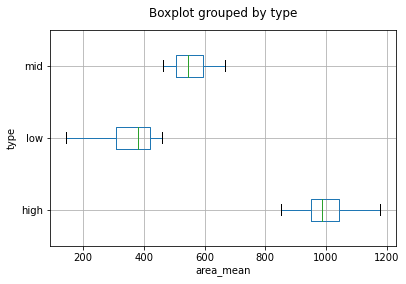

In [31]:
boxplot = df.boxplot(column='area_mean', by='type', vert=False)
boxplot.set_title("")
boxplot.set_ylabel("type")
boxplot.set_xlabel("area_mean")

In [32]:
def test_Anova(df):
    low = df.loc[df.type=="low"].area_mean
    mid = df.loc[df.type=="mid"].area_mean
    high = df.loc[df.type=="high"].area_mean
    Tc1, Tc2, Tc3 = np.sum(low), np.sum(mid), np.sum(high)
    sum_sqrTcx = np.power(np.sum(low), 2) + np.power(np.sum(mid), 2) + np.power(np.sum(high), 2)
    c = 3
    n1, n2, n3 = low.size, mid.size, high.size; n = (n1 + n2 + n3) // c
    N = n1 + n2 + n3
    sumTcx_sqr = np.power(Tc1 + Tc2 + Tc3, 2)
    const_subtract = sumTcx_sqr / N
    sum_sqrx = np.sum(np.power(low, 2)) + np.sum(np.power(mid, 2)) + np.sum(np.power(high, 2))

    SS_rl = (sum_sqrTcx / n) - const_subtract; print("SSфакт = ", "{:.6f}".format(SS_rl))
    SS_gnr = sum_sqrx - const_subtract; print("SSзаг = ", "{:.6f}".format(SS_gnr))
    SS_rnd = SS_gnr - SS_rl; print("SSвип = ", "{:.6f}".format(SS_rnd))
    d_rl = c - 1; print("dфакт = ", d_rl)
    d_gnr = N - 1; print("dзаг = ", d_gnr)
    d_rnd = d_gnr - d_rl; print("dвип = ", d_rnd)
    MS_rl = SS_rl / d_rl; print("MSфакт = ", "{:.6f}".format(MS_rl))
    MS_rnd = SS_rnd / d_rnd; print("MSвип = ", "{:.6f}".format(MS_rnd))
    F_emp = MS_rl / MS_rnd; print("Fемпір = ", "{:.6f}".format(F_emp))
    table_crit = pd.read_excel("Critical Values of the F-test.xlsx")
    f1, f2 = d_rl, d_rnd
    F_crit = table_crit.iloc[31,2]; print(f"Fкрит({f1},{f2}) = ", F_crit)
    if F_emp>=F_crit:
        print("\nрівність середніх не підтверджена")
    else:
        print("\nрівність середніх підтверджена")

In [33]:
test_Anova(df)

SSфакт =  39804141.733893
SSзаг =  42300184.085494
SSвип =  2496042.351601
dфакт =  2
dзаг =  566
dвип =  564
MSфакт =  19902070.866947
MSвип =  4425.607006
Fемпір =  4497.026247
Fкрит(2,564) =  3.0

рівність середніх не підтверджена
